In [10]:
from settings import *

In [11]:
qubits = TriangularLayoutA(m=1, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

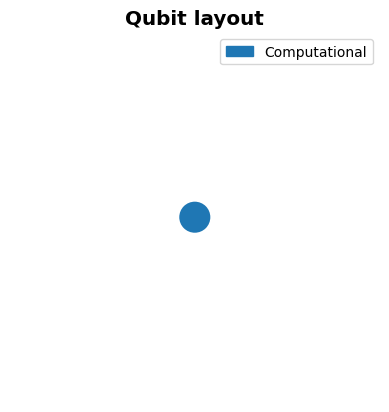

In [12]:
qubits.show_layout()

In [13]:
# theta_opt, errors, thetas = optimize(circuit, training_data_short, max_count=100)

# theta_opt = np.save("ham_theta_opt.npy", theta_opt)
# thetas = np.save("ham_thetas.npy", thetas)
# errors = np.save("ham_errors.npy", errors)

In [14]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [15]:
theta_opt

array([2.27802772, 1.67938648, 2.01911108, 1.5       , 2.01911108,
       2.37905579, 2.03335429, 1.5       , 2.03335429, 1.5855618 ,
       2.27239772, 1.5       , 2.27239772, 2.09194168, 1.88145832,
       1.5       , 1.88145832, 2.03536061, 2.29426738, 1.5       ])

rho_rand_haar: seed=64517


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

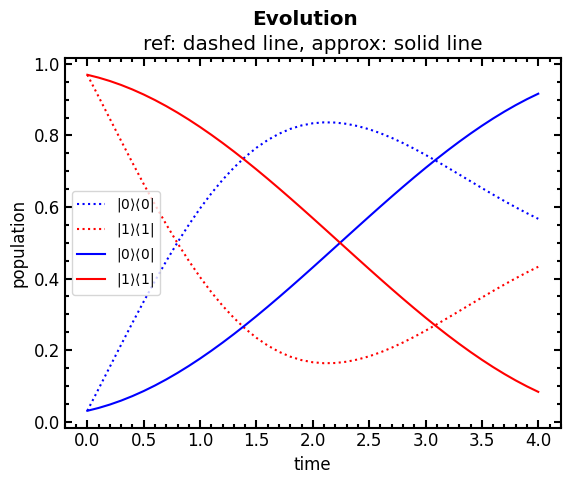

In [16]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.1, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

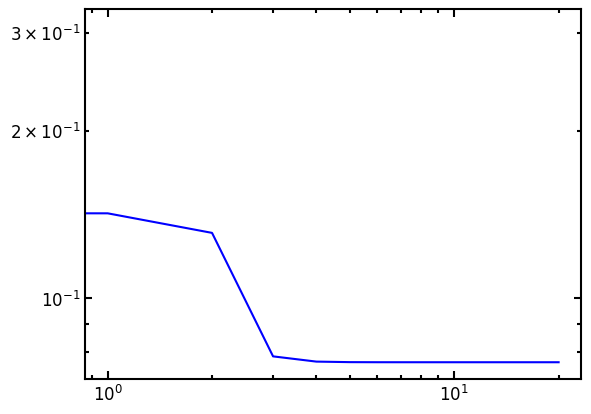

In [17]:
plt.loglog(errors)